In [2]:
import numpy as np
import scipy.stats as sps
import math
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from statsmodels.distributions.empirical_distribution import ECDF
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Сравнение эмпирического и теоретического распределения для нормального распределения.

In [3]:
N = 10000
sample = sps.norm.rvs(size=N)

In [13]:
def plt_ecdf(s):
    ecdf = ECDF(sample[:s])
    plt.step(ecdf.x, ecdf.y, label='ECDF')
    plt.scatter(sample[:s], np.zeros(s), alpha=0.2)
    plt.plot(ecdf.x, sps.norm.cdf(ecdf.x))
    plt.grid()

### Эмпирическое и теоретическое нормальное распределение для выборки размера n = 10:

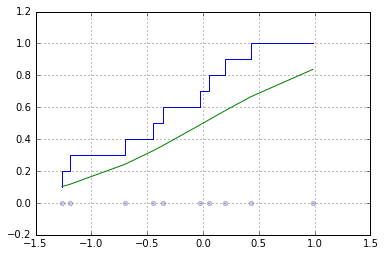

In [14]:
plt_ecdf(10)

Эмпирическое и теоретическое нормальное распределение для выборки размера <b>n = 25</b>:

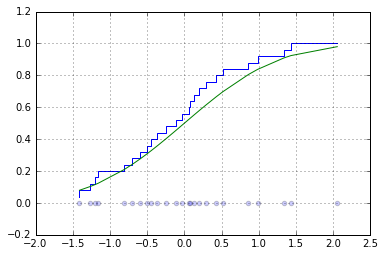

In [15]:
plt_ecdf(25)

Эмпирическое и теоретическое нормальное распределение для выборки размера <b>n = 50</b>:

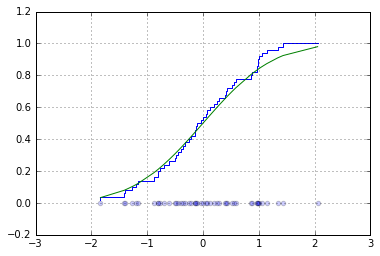

In [16]:
plt_ecdf(50)

Эмпирическое и теоретическое нормальное распределение для выборки размера <b>n = 100</b>:

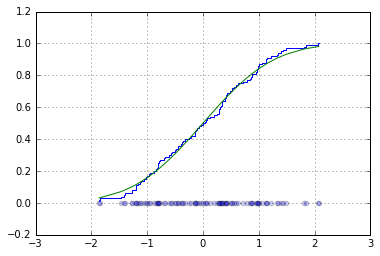

In [17]:
plt_ecdf(100)

Эмпирическое и теоретическое нормальное распределение для выборки размера <b>n = 1000</b>:

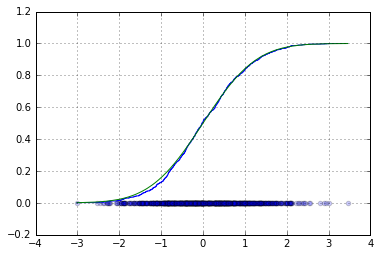

In [18]:
plt_ecdf(1000)

Эмпирическое и теоретическое нормальное распределение для выборки размера <b>n = 10000</b>:

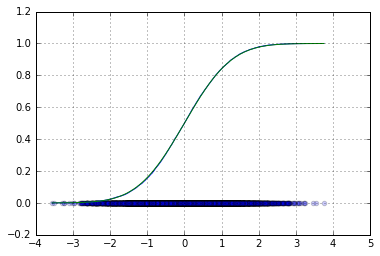

In [19]:
plt_ecdf(N)

Из графиков видно, что при достаточно больших размерах выборки эмпирическое распределение весьма точно приближает реальное. 

### Теорема Гливенко-Кантелли:

$D_n = \sup\limits_{x \in \mathbb{R}}| F_{n}(x) - F(x)| \xrightarrow{п.н.} 0$.

Найдем $D_n$ для $n$ от 1 до 10000. Проверим справедливость теоремы Гливенко-Кантелли.

Чтобы посчитать супремум разности $F_n$ и $F$ достаточно рассматривать точки из выборки, ввиду ступенчатости эмпирической функции распределения.

In [36]:
#работает ~16c
sup = np.array([])
for s in range(1, N + 1):
    ecdf = ECDF(sample[:s])#В задании требовалось посчитать ECDF для каждого n. Это делается здесь.
    sup = np.append(sup, np.max(abs(ecdf.y[1:] - sps.norm.cdf(ecdf.x[1:]))))

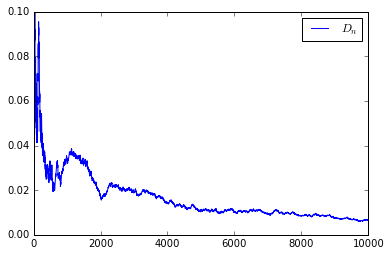

In [42]:
plot(np.arange(1, N + 1), sup, label='$D_n$')
plt.ylim(0, 0.1)
plt.legend()
plt.show()

Видим, что супремум разности действительно стремится к 0.